# Mobile Money and Financial Inclusion

# Using Zindi Data


The objective of this competition is to create a machine learning model to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance).
This model can help mobile money providers target new clients and markets across Tanzania more effectively, and also help financial services providers cross-sell other financial services (savings, credit, and insurance) to the existing mobile money customer base.
This competition is sponsored by HDIF, Data Lab Tanzania, and esri.

# Goal
Predict Who is most likely to use mobile money? And who is most likely to use other financial services?

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import glob
import errno
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
os.chdir("C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMappingMapping/FSDT_FinAccessMapping")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMappingMapping/FSDT_FinAccessMapping'

In [25]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [30]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv 
combined_csv.to_csv("combined_csv.csv", index = False,encoding = 'unicode_escape')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf6 in position 7: invalid start byte

In [6]:
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
#uploading the dataset
df1 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/sample_submission.csv')
df2 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/test.csv')
df3 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/training.csv')


In [8]:
df3.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [9]:
# Mapping data
mp1 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/3rd_ppp_for_upload_win.csv',encoding = 'unicode_escape')
mp2 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/atm_for_upload_win.csv',encoding = 'unicode_escape')
mp3 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/banks_for_upload_win.csv',encoding = 'unicode_escape')
mp4 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/bus_stands_for_upload_win.csv',encoding = 'unicode_escape')
mp5 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/microfinance_for_upload_win.csv',encoding = 'unicode_escape')
mp6 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv',encoding = 'unicode_escape')
mp7 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/pos_for_upload_win.csv',encoding = 'unicode_escape')
mp8 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/post_office_for_upload_win.csv',encoding = 'unicode_escape')
mp9 = pd.read_csv('C:/Users/dmunene/OneDrive - Dalberg Global Development Advisors/RESSOL/Personal/Data Analysis/Zindi/MMF TZ Challenge/Mapping/FSDT_FinAccessMapping/sacco_for_upload_win.csv',encoding = 'unicode_escape')


C:\Users\dmunene\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (26,32,33,42,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
result  = pd.merge(pd.merge(mp1,mp2, on ='ward'),mp3, on = 'ward')

In [35]:
result1  = pd.merge(pd.merge(mp4,mp5, on ='ward'),mp6, on = 'ward')

In [36]:
result2  = pd.merge(pd.merge(mp7,mp8, on ='ward'),mp9, on = 'ward')

In [37]:
result3  = pd.merge(pd.merge(result,result1, on ='ward'),result2, on = 'ward')

MemoryError: 

In [11]:
result.head()

,region_x,district_x,ward,latitude_x,longitude_x,agent_name,standalone_agent,other_activities,trading_hours,provider_selcom,...,bank_name_short,yr_operation_started,number_atms,services_deposits,services_withdrawls,services_bill_payment,services_buy_airtime,other_services,visa_mastercard,umoja_nmb
0,Mwanza,Ilemela,Nyakato,-2.53201,32.9478,Dady Mpesa Shop,Conduct other business,Accessories,12 hours,NaN,...,Mkombozi Commercial Plc,26/02/2012,1,NaN,Yes,NaN,NaN,NaN,Both,
1,Mwanza,Ilemela,Nyakato,-2.53201,32.9478,Dady Mpesa Shop,Conduct other business,Accessories,12 hours,NaN,...,NMB,20/04/2012,3,NaN,Yes,NaN,NaN,NaN,Both,NMB Bank Card
2,Mwanza,Ilemela,Nyakato,-2.53201,32.9478,Dady Mpesa Shop,Conduct other business,Accessories,12 hours,NaN,...,NBC,17/08/2011,2,NaN,Yes,NaN,NaN,NaN,Both,
3,Mwanza,Ilemela,Nyakato,-2.53201,32.9478,Dady Mpesa Shop,Conduct other business,Accessories,12 hours,NaN,...,Stanbic,01/03/2013,2,NaN,Yes,NaN,NaN,NaN,Both,
4,Mwanza,Ilemela,Nyakato,-2.53180,32.9520,Marium Mpesa Shop,Conduct other business,CD&DVD Library,12 hours,NaN,...,Mkombozi Commercial Plc,26/02/2012,1,NaN,Yes,NaN,NaN,NaN,Both,


In [21]:
frames = [mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9]

In [22]:
frames = [df.set_index('ward') for df in frames]
frames[0].join(frames[1:]) 

MemoryError: 

In [23]:
df = next(frames)
for df_ in frames:
    df = df.merge(df_, on='ward')

TypeError: 'list' object is not an iterator

In [19]:
mapping_files = pd.concat(iDF.set_index('ward') for iDF in [mp1,mp2,mp3], axis = 1,join= 'outer').reset_index()

SyntaxError: Generator expression must be parenthesized if not sole argument (<ipython-input-19-769092924375>, line 1)

In [14]:
mapping_files.columns

Index(['Bar_local_services', 'BureaudeExchange_local_services',
       'Caf__local_services', 'CellularShop_local_services',
       'ElectronicShop_local_services', 'GeneralDealer_local_services',
       'GroceryStore_local_services', 'Hotel_local_services',
       'MFI_mob_fin_services',
       'Other than those listed above are there any other services provided?',
       ...
       'voucher_use_reason', 'ward', 'weekend_trading',
       'withdrawls_airtel_cash', 'withdrawls_ezy_pesa', 'withdrawls_m_pesa',
       'withdrawls_tigo_pesa', 'yr_operation_started', 'yr_started',
       'yr_started_reformatted'],
      dtype='object', length=239)

In [15]:
mapping_files.head()

,Bar_local_services,BureaudeExchange_local_services,Caf__local_services,CellularShop_local_services,ElectronicShop_local_services,GeneralDealer_local_services,GroceryStore_local_services,Hotel_local_services,MFI_mob_fin_services,Other than those listed above are there any other services provided?,...,voucher_use_reason,ward,weekend_trading,withdrawls_airtel_cash,withdrawls_ezy_pesa,withdrawls_m_pesa,withdrawls_tigo_pesa,yr_operation_started,yr_started,yr_started_reformatted
0,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Nyanguge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Nyakato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Segerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,Kijitonyama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,Kigamboni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
new_dt = pd.merge(df3,mapping_files)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# UP TO HERE

# Previewing our Data

There data has already been split into train and test. Training should be used to develop a model off features notable in the sample.

The test data will then be used to assess how well the model performs on unseen data. Since these are merely predictions, a score would help gauge the outcome. the sample_submission provides an idea into how the submission file should look like.

In [302]:
#previewing our data i.e the sample_submission data
df1.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [303]:
#previewing our test data i.e test data
df2.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,...,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,...,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,...,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,...,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,...,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [304]:
# Adding the classification column
#df2['mobile_money_classification'] = np.nan

In [305]:
#previewing our train data
df3.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [306]:
#previewing our train data
df3.tail()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7090,881,32,1,1,6,3,1,1,0,1,...,-1,1,1,-2.635156,32.945423,1,1,0,0,3
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0
7092,5416,28,2,1,3,1,2,2,0,1,...,-1,1,4,-8.090712,35.836560,1,0,0,1,3
7093,3946,78,1,3,1,1,2,2,0,0,...,-1,4,4,-5.192204,38.764523,0,0,0,0,0


In [307]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

# Feature Engineering 

# Target is stored in 'y'. 

In [308]:
#copy of train data
clean_data = df3.copy()
#copy of test data
clean_data2 = df2.copy()
#y_train
y=clean_data[['mobile_money_classification']].copy()

In [309]:
#Dropping unnecessary columns
#df2 = df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1)

In [310]:
#are there any null values? in test dt
df2.isnull().any()

ID           False
Q1           False
Q2           False
Q3           False
Q4           False
Q5           False
Q6           False
Q7           False
Q8_1         False
Q8_2         False
Q8_3         False
Q8_4         False
Q8_5         False
Q8_6         False
Q8_7         False
Q8_8         False
Q8_9         False
Q8_10        False
Q8_11        False
Q9           False
Q10          False
Q11          False
Q12          False
Q13          False
Q14          False
Q15          False
Q16          False
Q17          False
Q18          False
Q19          False
Latitude     False
Longitude    False
dtype: bool

In [311]:
#are there any null values? in train dt
df3.isnull().any()

ID                             False
Q1                             False
Q2                             False
Q3                             False
Q4                             False
Q5                             False
Q6                             False
Q7                             False
Q8_1                           False
Q8_2                           False
Q8_3                           False
Q8_4                           False
Q8_5                           False
Q8_6                           False
Q8_7                           False
Q8_8                           False
Q8_9                           False
Q8_10                          False
Q8_11                          False
Q9                             False
Q10                            False
Q11                            False
Q12                            False
Q13                            False
Q14                            False
Q15                            False
Q16                            False
Q

In [312]:
df3.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [313]:
#Dropping unnecessary columns
#df3 = df3.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare','Survived'],axis=1)

In [314]:
df3['Q1'].head()

0    98
1    40
2    18
3    50
4    34
Name: Q1, dtype: int64

In [315]:
df3.index

RangeIndex(start=0, stop=7094, step=1)

In [316]:
# summarizing the train dt
df3.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [317]:
#number of times the Mobile_money_classification appear
clean_data['mobile_money_classification'].value_counts()

3    3126
1    1778
0    1386
2     804
Name: mobile_money_classification, dtype: int64

In [318]:
df3.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [319]:
df3['mobile_money'].value_counts()

1    3930
0    3164
Name: mobile_money, dtype: int64

In [320]:
df2['Q2'].value_counts()

2    1368
1     997
Name: Q2, dtype: int64

In [321]:
df3['Q2'].value_counts()

2    3972
1    3122
Name: Q2, dtype: int64

In [322]:
df3['Q2'].value_counts()

2    3972
1    3122
Name: Q2, dtype: int64

In [323]:
df3.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


# Data Visualization

Exploring the Variables of interest to get a feel of how they look

In [324]:
#Checking the variables in train data
df3.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

Applying different styles

In [325]:
plt.style.use("classic")
#plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
#plt.style.use("seaborn-whitegrid")
#plt.style.use("seaborn-pastel")
#plt.style.use(["dark_background", "fivethirtyeight"])

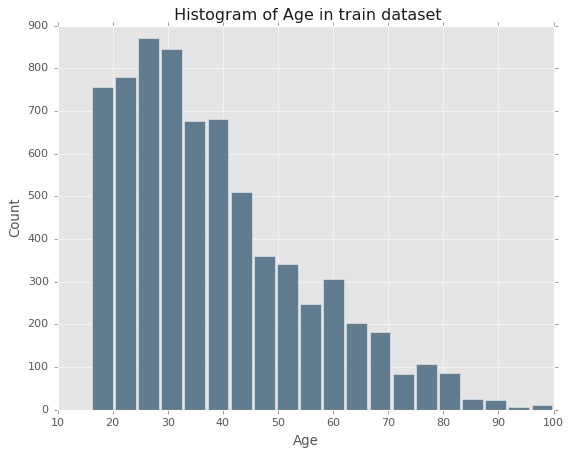

In [326]:
#histogram for Age

df3['Q1'].plot.hist(grid = True,bins = 20, rwidth = 0.9,color = '#607c8e')

plt.title(' Histogram of Age in train dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [327]:
df3['Q2'].value_counts()

2    3972
1    3122
Name: Q2, dtype: int64

In [328]:
replace_map = {1:"Male",2:"Female"}
df3.Q2.map(replace_map)
df3.Q2.replace(replace_map,inplace = True)

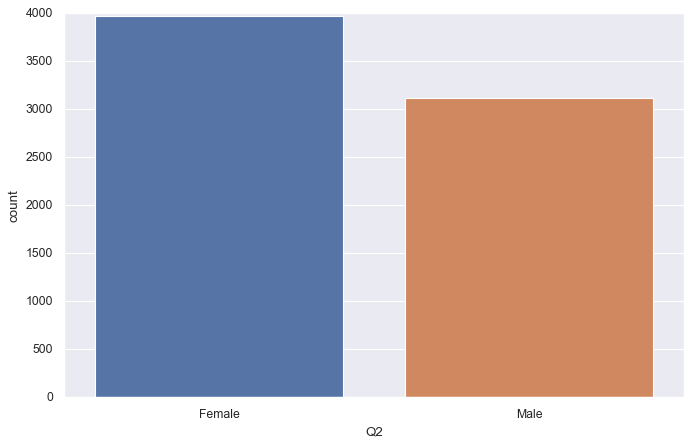

In [329]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")

ax = sns.countplot(x="Q2", data=df3,saturation=.80)


In [330]:
replace_map5 = {1:"No formal Education",2:"Some Primary",3:"Primary Completed",4:"Post Primary Technical Training",5:"Some Secondary",6:"University or Other higher Education",7:"Don't know",8:"Not Specified"}
df3.Q4.map(replace_map5)
df3.Q4.replace(replace_map5,inplace = True)

In [331]:
replace_map6 = {1:"Yes",2:"No"}
df3.Q7.map(replace_map6)
df3.Q7.replace(replace_map6,inplace = True)

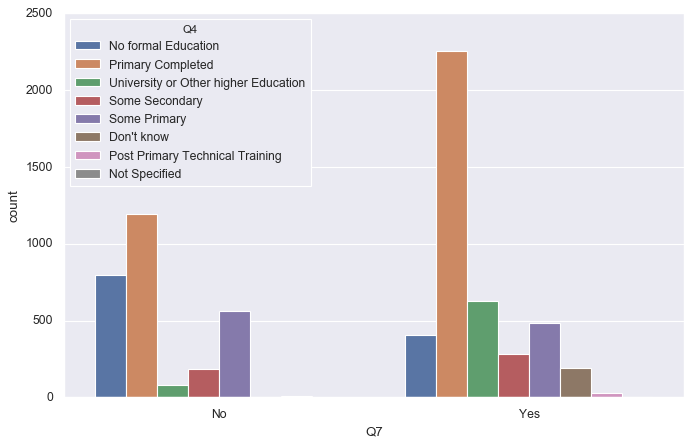

In [332]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")

ax = sns.countplot(x = "Q7",hue = "Q4",data = df3)

In [333]:
replace_map1 = {1:"Yes",0:"No"}
df3.mobile_money.map(replace_map1)
df3.mobile_money.replace(replace_map1,inplace = True)

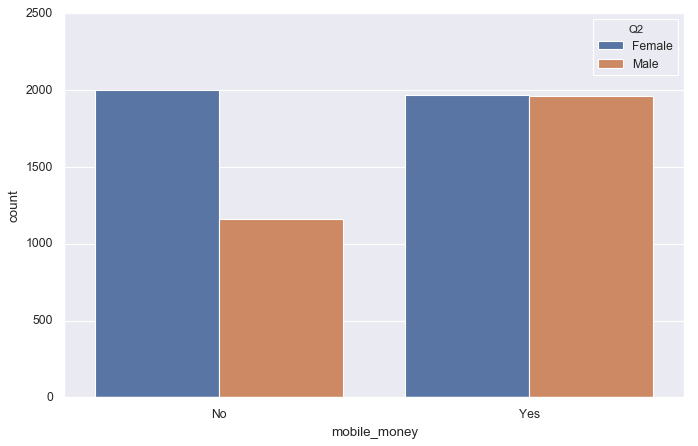

In [334]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
#tit = sns.load_dataset("clean_data")
ax = sns.countplot(x="mobile_money",hue="Q2", data=df3)


In [335]:
replace_map2 = {1:"Yes",0:"No"}
df3.savings.map(replace_map2)
df3.savings.replace(replace_map2,inplace = True)

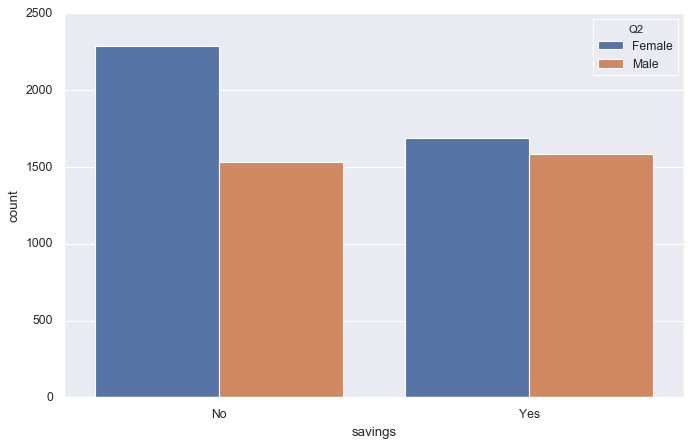

In [336]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.countplot(x='savings', hue = "Q2",data=df3, saturation=.80)

In [337]:
replace_map3 = {1:"Yes",0:"No"}
df3.borrowing.map(replace_map3)
df3.borrowing.replace(replace_map3,inplace = True)

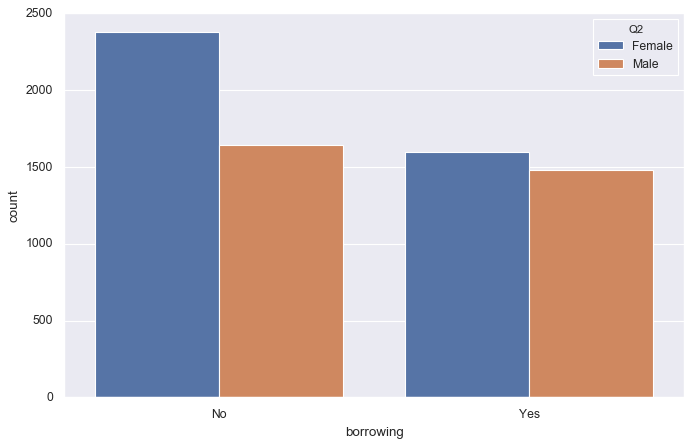

In [338]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.countplot(x='borrowing', hue = "Q2",data=df3, saturation=.80)

In [339]:
replace_map4 = {1:"Yes",0:"No"}
df3.insurance.map(replace_map4)
df3.insurance.replace(replace_map4,inplace = True)

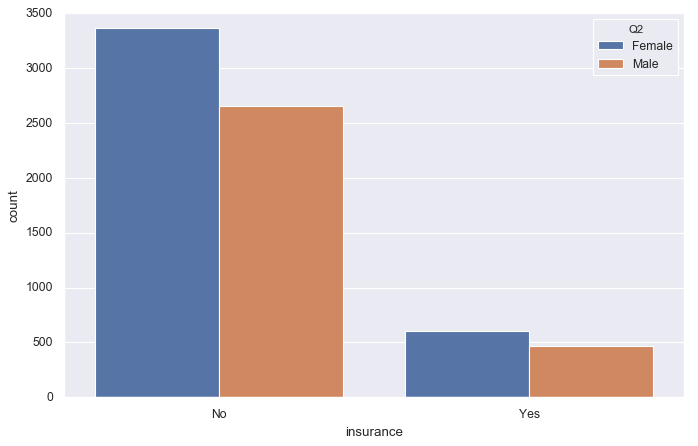

In [340]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
ax = sns.countplot(x='insurance', hue = "Q2",data=df3, saturation=.80)

In [341]:
replace_map7 = {-1:"Not Applicable",1:"Yesterday/Today",2:"In the past 7 days",3:"In the past 30 days",4:"In the past 90 days",5:"More than 90 days but less than 6 months",6:"6 Months or longer"}
df3.Q15.map(replace_map7)
df3.Q15.replace(replace_map7,inplace = True)

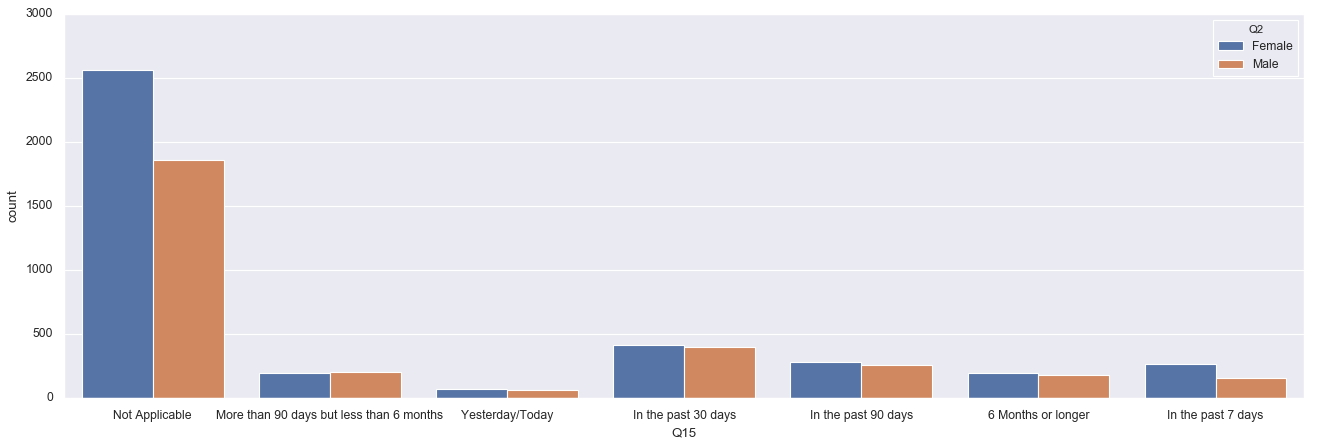

In [342]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.set(style="darkgrid")
ax = sns.countplot(x='Q15', hue = "Q2",data=df3, saturation=.80)

# Assessing the influence of different variables to the rate of survival

In [343]:
clean_data['mobile_money_classification'].corr(clean_data['Q1'])

-0.12788081543915758

In [344]:
clean_data['mobile_money_classification'].corr(clean_data['Q2'])

-0.1425216643298993

In [345]:
clean_data['mobile_money_classification'].corr(clean_data['Q3'])

-0.03332979387433624

In [346]:
clean_data['mobile_money_classification'].corr(clean_data['Q4'])

0.3373402880088536

In [347]:
clean_data['mobile_money_classification'].corr(clean_data['Q7'])

-0.5294444415601297

In [348]:
clean_data['mobile_money_classification'].corr(clean_data['Q8_1'])

0.1856118975090343

In [349]:
clean_data['mobile_money_classification'].corr(clean_data['Q15'])

0.5425923138139234

In [350]:
clean_data['mobile_money_classification'].corr(clean_data['Q16'])

0.4982392932021438

In [351]:
clean_data['mobile_money_classification'].corr(clean_data['Q17'])

0.2814397535607834

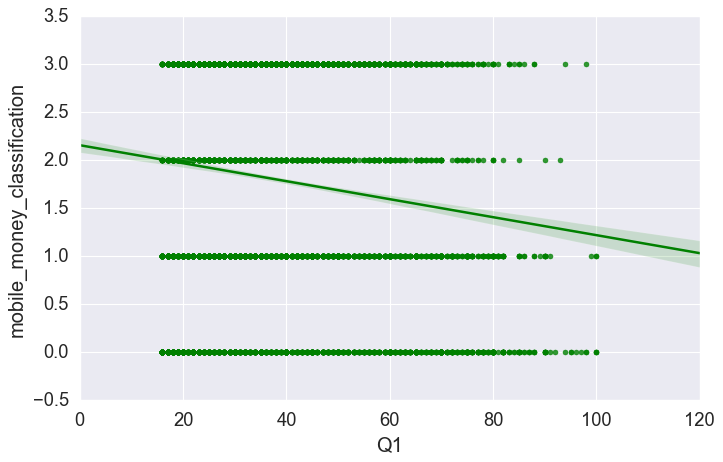

In [352]:
#scatterplot of Age and mobile_money_classification in seaborn
plt.figure(figsize=(10,6))

sns.set(font_scale=1.5)
x = clean_data['Q1']
y = clean_data['mobile_money_classification']
sns.regplot(x,y, fit_reg=True, color = 'green')

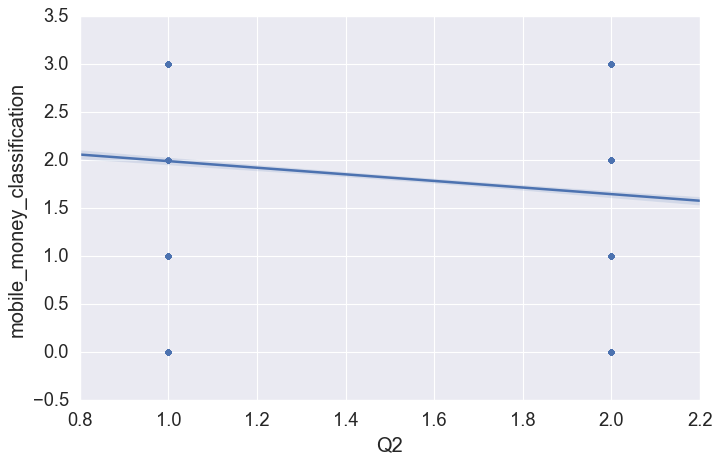

In [353]:
#scatterplot of Sex and mobile_money_classification in seaborn
plt.figure(figsize=(10,6))

x = clean_data['Q2']
y = clean_data['mobile_money_classification']
sns.regplot(x,y, fit_reg=True)

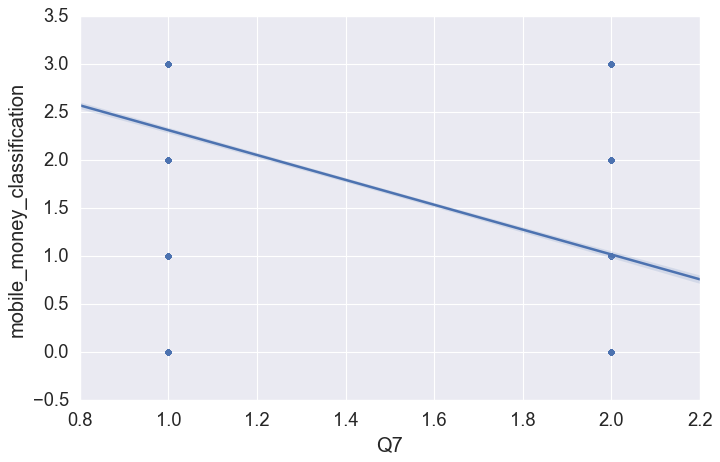

In [354]:
#scatterplot of Phone ownership and mobile_money_classification in seaborn
plt.figure(figsize=(10,6))

x = clean_data['Q7']
y = clean_data['mobile_money_classification']
sns.regplot(x,y, fit_reg=True)

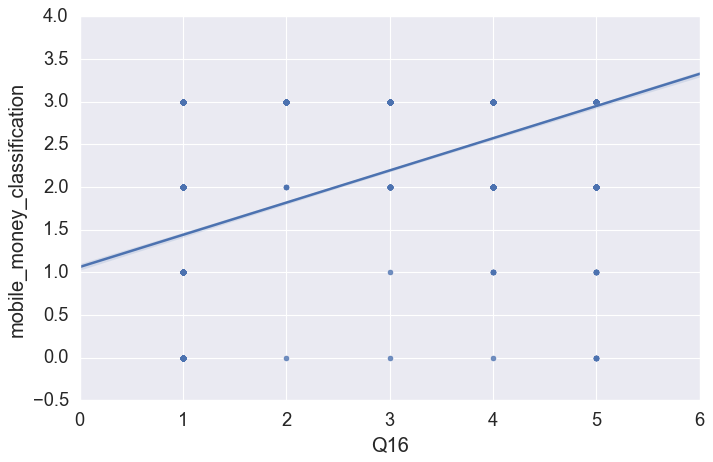

In [355]:
#scatterplot of savings and mobile_money_classification in seaborn
plt.figure(figsize=(10,6))
x = clean_data['Q16']
y = clean_data['mobile_money_classification']
sns.regplot(x,y, fit_reg=True)

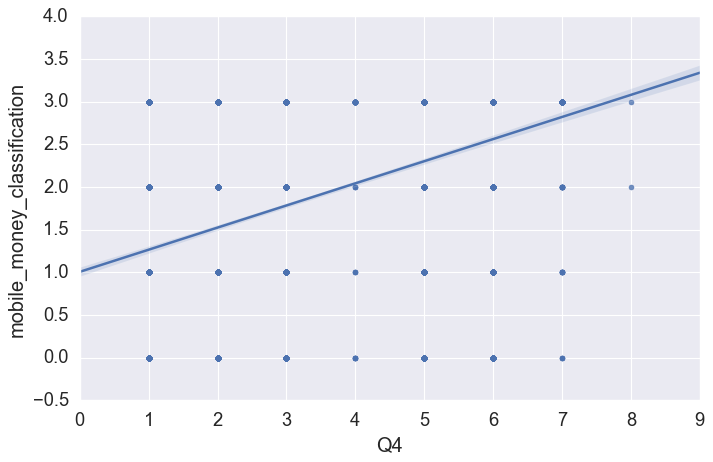

In [356]:
#scatterplot of Education level and mobile_money_classification in seaborn
plt.figure(figsize=(10,6))
x = clean_data['Q4']
y = clean_data['mobile_money_classification']
sns.regplot(x,y, fit_reg=True)

# Violin Plots on Possible Feautures

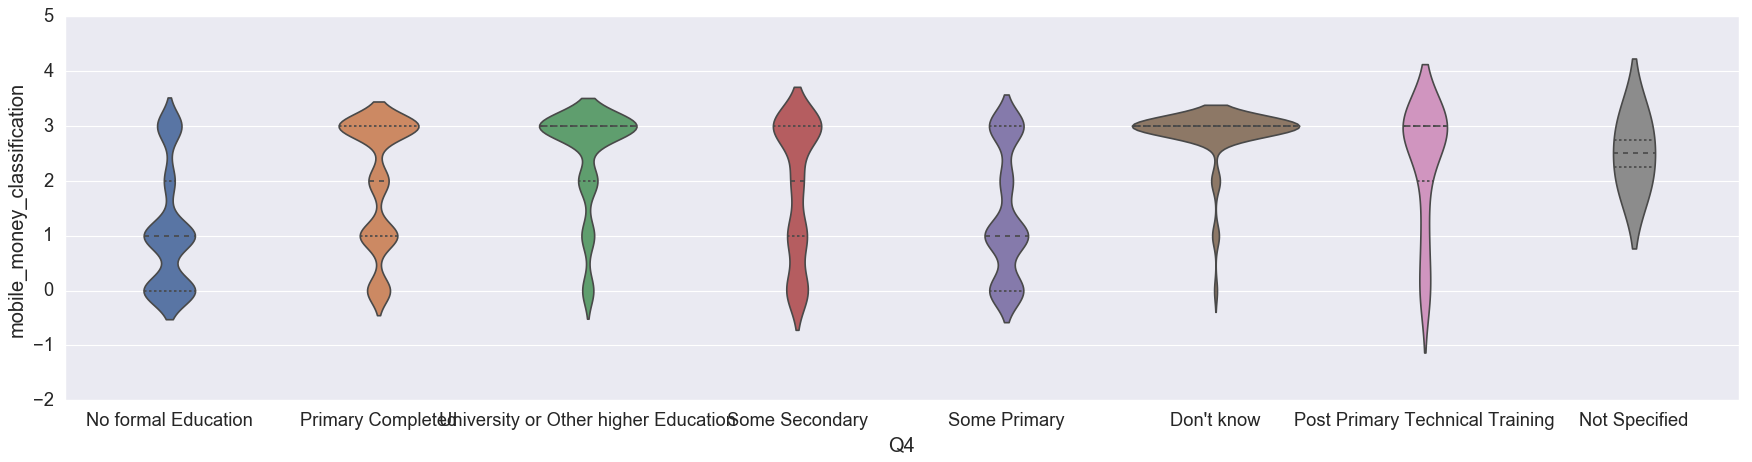

In [357]:
plt.figure(figsize=(27,6))
sns.violinplot(y = 'mobile_money_classification', x = 'Q4', data = df3, inner = 'quartile')

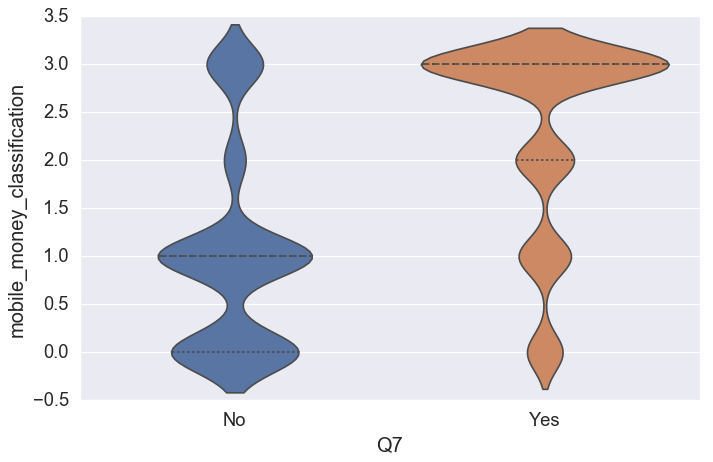

In [358]:
plt.figure(figsize=(10,6))
sns.violinplot(y = 'mobile_money_classification', x = 'Q7', data = df3, inner = 'quartile')

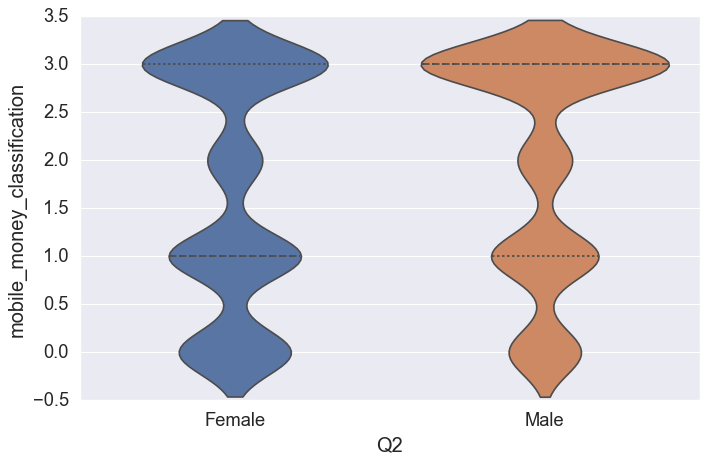

In [359]:
plt.figure(figsize=(10,6))
sns.violinplot(y = 'mobile_money_classification', x = 'Q2', data = df3, inner = 'quartile')

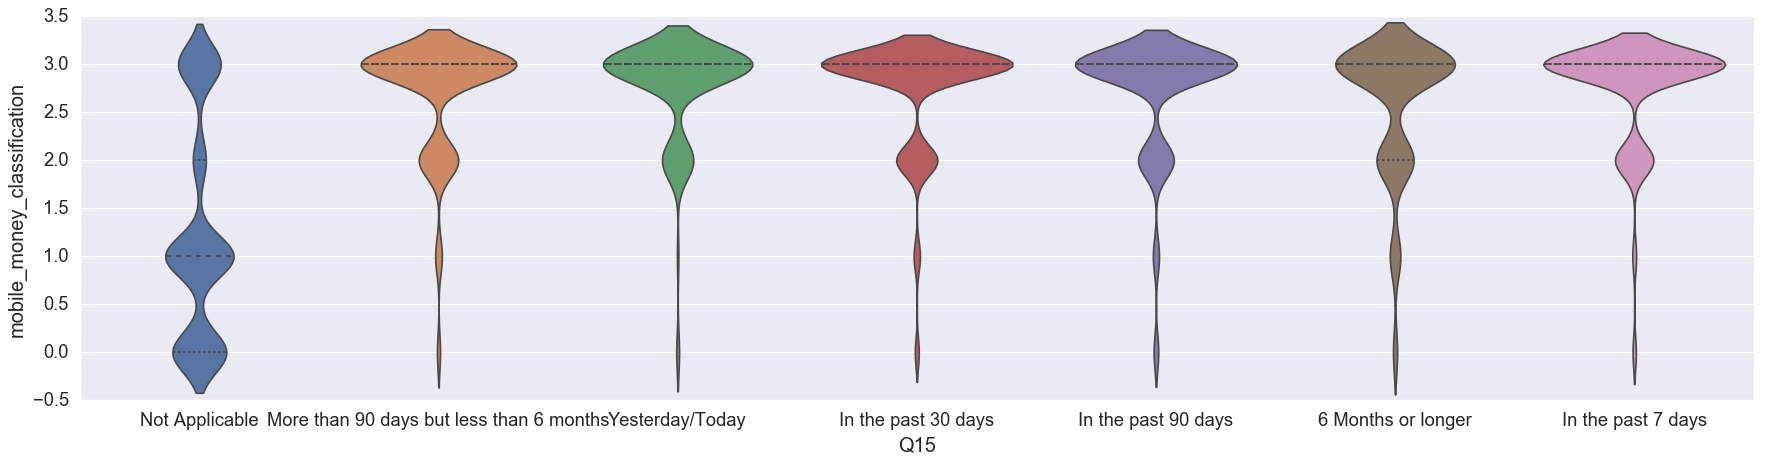

In [360]:
plt.figure(figsize=(27,6))
sns.violinplot(y = 'mobile_money_classification', x = 'Q15', data = df3, inner = 'quartile')

# Using Features to predict Mobile Money Classification

In [361]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [362]:
clean_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [363]:
mobilemoney_featuresnames = clean_data.drop(["mobile_money_classification","mobile_money","savings","borrowing","insurance"], axis = 1)
mobilemoney_features = list(mobilemoney_featuresnames)
print(mobilemoney_features)

['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Latitude', 'Longitude']


In [364]:
X = clean_data[mobilemoney_features].copy()

In [365]:
X.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude'],
      dtype='object')

In [366]:
y.head()

0    0
1    3
2    2
3    3
4    3
Name: mobile_money_classification, dtype: int64

# Method 1

In [367]:
#Fitting a DecisionTree

dtree_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=389)
dtree_classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=389,
            splitter='best')

In [368]:
type(dtree_classifier)

sklearn.tree.tree.DecisionTreeClassifier

# Method 2

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [370]:
#Fitting a RandomForest

rf_model = RandomForestClassifier(n_estimators=1000,max_features=3,oob_score=True,random_state = 389)

In [371]:
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=389, verbose=0, warm_start=False)

# Predict on Test Set

In [372]:
df2.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude'],
      dtype='object')

In [373]:
df2.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,...,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,...,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,...,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,...,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,...,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [374]:
#predicting on method 1
predictions = dtree_classifier.predict(df2)

In [375]:
#predicting on method 2
predictions2 = rf_model.predict(df2)

In [376]:
predictions[:10]

array([3, 3, 3, 1, 3, 3, 3, 3, 0, 3], dtype=int64)

In [377]:
predictions2[:10]

array([3, 3, 3, 1, 3, 3, 3, 3, 0, 3], dtype=int64)

In [378]:
type(predictions2)

numpy.ndarray

# Merging predictions array to test dataset

In [379]:
#data frame on prediction
pred_mmf = pd.DataFrame(predictions)
pred_mmf.columns = ['mobile_money_classification']

frames = [clean_data2,pred_mmf]

result = pd.concat(frames, axis=1)

In [380]:
#data frame on prediction 2
pred_mmf2 = pd.DataFrame(predictions2)
pred_mmf2.columns = ['mobile_money_classification']

frames2 = [clean_data2, pred_mmf2]

result2 = pd.concat(frames2, axis=1)

In [381]:
#Dropping unnecessary columns from the output
output = result.drop(result.columns[1:32],axis=1)
print(output)

        ID  mobile_money_classification
0     2352                            3
1     8208                            3
2     2785                            3
3     2967                            1
4     1697                            3
5     4794                            3
6     2675                            3
7     2989                            3
8     1634                            0
9     4147                            3
10    8003                            3
11    1058                            1
12    8172                            1
13    2640                            1
14    1233                            3
15    8632                            3
16    4548                            3
17    1032                            0
18     270                            3
19    5516                            3
20    1289                            3
21     376                            0
22    5856                            3
23    2588                            3


In [382]:
#Dropping unnecessary columns from the output
output2 = result2.drop(result2.columns[1:32],axis=1)
print(output2)



        ID  mobile_money_classification
0     2352                            3
1     8208                            3
2     2785                            3
3     2967                            1
4     1697                            3
5     4794                            3
6     2675                            3
7     2989                            3
8     1634                            0
9     4147                            3
10    8003                            3
11    1058                            3
12    8172                            1
13    2640                            0
14    1233                            3
15    8632                            3
16    4548                            3
17    1032                            0
18     270                            3
19    5516                            3
20    1289                            3
21     376                            3
22    5856                            3
23    2588                            3


In [383]:
output2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 2 columns):
ID                             2365 non-null int64
mobile_money_classification    2365 non-null int64
dtypes: int64(2)
memory usage: 37.0 KB


In [384]:
#Print out the head of the expected output
output.head()

,ID,mobile_money_classification
0,2352,3
1,8208,3
2,2785,3
3,2967,1
4,1697,3


In [385]:
#Print out the head of the expected output
output2.head()

,ID,mobile_money_classification
0,2352,3
1,8208,3
2,2785,3
3,2967,1
4,1697,3


In [386]:
pred_mmf2.head()

,mobile_money_classification
0,3
1,3
2,3
3,1
4,3


# Measure Accuracy of the Classifier and Comparing Methods

In [387]:
# expected outcome format
df1.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [388]:
#dropping Id to assess accuracy on survived column
#df1 = df1.drop(['ID'],axis=1)

#accuracy_score(y_true=df1,y_pred=predictions)

In [389]:
print("OOB_accuracy:")
print(rf_model.oob_score_)

OOB_accuracy:
0.6611220749929518


In [390]:
# Assessing the importance of variables
for feature, imp in zip(X,rf_model.feature_importances_):
    print(feature,imp)

ID 0.09606788181039241
Q1 0.08866022670013157
Q2 0.01637685938424119
Q3 0.026389832548431143
Q4 0.036970451234220575
Q5 0.03804079327654836
Q6 0.011780618319729713
Q7 0.040291944400589134
Q8_1 0.004373352981906717
Q8_2 0.010437271390265433
Q8_3 0.004346021797832162
Q8_4 0.015995644952522727
Q8_5 0.001530706722629102
Q8_6 0.0008276582408317104
Q8_7 0.0006403411881973315
Q8_8 0.003310386424404737
Q8_9 0.011388475843147873
Q8_10 0.007669191699493458
Q8_11 0.0002537733861521856
Q9 0.005362716108999709
Q10 0.026368276959107265
Q11 0.005764189684044095
Q12 0.04712895120948789
Q13 0.04933777097323661
Q14 0.06555756320934374
Q15 0.07061072579136726
Q16 0.05792217985733893
Q17 0.01791960768998594
Q18 0.023026347969830992
Q19 0.023516541005848792
Latitude 0.09562521912097864
Longitude 0.09650847811876252


In [391]:
#replace_map = {0:"no_fin_services",1:"other_only",2:"mm_only",3:"mm_plus"}
#output2.mobile_money_classification.map(replace_map)
#output2.mobile_money_classification.replace(replace_map,inplace = True)


In [392]:
#output2=output['mobile_money_classification'].astype("category", axis=1, inplace= True)
#output2 = pd.get_dummies(output2['mobile_money_classification'])
#output2.head()

In [393]:
# Split response variable into dummy variables
output2_onehot = output2.copy()
output2_onehot = pd.get_dummies(output2_onehot,columns = ['mobile_money_classification'])
output2_onehot.rename(columns = {'mobile_money_classification_0': 'no_fin_services','mobile_money_classification_1':'other_only','mobile_money_classification_2':'mm_only','mobile_money_classification_3':'mm_plus'}, inplace = True)

print(output2_onehot.head())

     ID  no_fin_services  other_only  mm_only  mm_plus
0  2352                0           0        0        1
1  8208                0           0        0        1
2  2785                0           0        0        1
3  2967                0           1        0        0
4  1697                0           0        0        1


In [394]:
#Creating Submission dataframe for Zindi
mysubmission = pd.DataFrame(output2_onehot)

#Saving to CSV
mysubmission.to_csv("mm_classification_mysubmission.csv", index=False)